# Анализ запрос в Dadata

In [72]:
import pandas as pd

## Чтение журналов 

In [78]:
df = pd.read_csv('31151.csv')
df.head()

,timestamp,source,host,response_status,request_time,http_user_agent,message
0,2023-08-02T06:48:57.000Z,178.216.100.193,suggestions.dadata.ru,200,0.001,GuzzleHttp/7,GET /suggestions/api/4_1/rs/iplocate/address?i...
1,2023-08-02T06:48:57.000Z,178.216.100.193,suggestions.dadata.ru,200,0.002,GuzzleHttp/7,GET /suggestions/api/4_1/rs/iplocate/address?i...
2,2023-08-02T06:48:57.000Z,178.216.100.193,suggestions.dadata.ru,200,0.001,GuzzleHttp/7,GET /suggestions/api/4_1/rs/iplocate/address?i...
3,2023-08-02T06:48:57.000Z,178.216.100.193,suggestions.dadata.ru,200,0.006,GuzzleHttp/7,GET /suggestions/api/4_1/rs/iplocate/address?i...
4,2023-08-02T06:48:57.000Z,178.216.100.193,suggestions.dadata.ru,200,0.002,GuzzleHttp/7,GET /suggestions/api/4_1/rs/iplocate/address?i...


## Анализ данных

In [75]:
df.nunique()

timestamp          2234
source                9
host                  2
response_status       2
request_time         28
http_user_agent       5
message              17
dtype: int64

> source - источник запросов - всего 9 уникальных значений

In [76]:
df.source.unique()

array(['178.216.100.193', '188.35.29.1', '178.216.98.64', '217.73.62.199',
       '195.38.23.9', '90.154.71.17', '109.252.176.52', '83.220.238.14',
       '89.23.156.102'], dtype=object)

> все уникальные адреса

In [84]:
df1=pd.DataFrame(df.source.value_counts())
df1.reset_index(inplace=True)
df1

,source,count
0,178.216.98.64,5958
1,217.73.62.199,5832
2,90.154.71.17,40
3,178.216.100.193,35
4,195.38.23.9,8
5,109.252.176.52,6
6,188.35.29.1,2
7,83.220.238.14,2
8,89.23.156.102,2


> Количество запросов

## Расшифровка ip адресов 

[How to Get Location Information of an IP Address Using Python](https://www.freecodecamp.org/news/how-to-get-location-information-of-ip-address-using-python)
[Location of a specific IP](https://ipapi.co/api/#complete-location)

In [85]:
import requests

In [86]:
def get_location(ip_address):
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name"),
        "org": response.get("org"),
        "hostname": response.get("hostname"),
    }
    return location_data

In [87]:
get_location('178.216.98.64')

{'ip': '178.216.98.64',
 'city': 'Moscow',
 'region': 'Moscow',
 'country': 'Russia',
 'org': 'Closed Joint Stock Company CROC incorporated',
 'hostname': None}

In [89]:
df1['org']=df1.source.apply(lambda x: get_location(x)['org'])
df1

,source,count,org
0,178.216.98.64,5958,Closed Joint Stock Company CROC incorporated
1,217.73.62.199,5832,Closed Joint Stock Company CROC incorporated
2,90.154.71.17,40,Rostelecom
3,178.216.100.193,35,Closed Joint Stock Company CROC incorporated
4,195.38.23.9,8,Closed Joint Stock Company CROC incorporated
5,109.252.176.52,6,PJSC Moscow city telephone network
6,188.35.29.1,2,Komplektorg Ooo
7,83.220.238.14,2,PVimpelCom
8,89.23.156.102,2,LLC Powernet


## Формирование статистики

Суммирование по принадлежности IP к компании

In [91]:
df2=df1.drop(labels=['source'],axis=1).groupby(['org']).sum()
df2

,count
org,
Closed Joint Stock Company CROC incorporated,11833
Komplektorg Ooo,2
LLC Powernet,2
PJSC Moscow city telephone network,6
PVimpelCom,2
Rostelecom,40


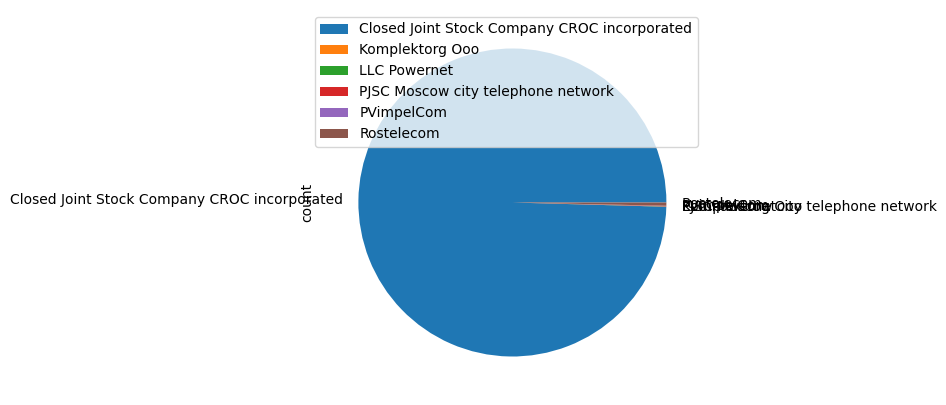

In [92]:
plot = df2.plot.pie(y='count', figsize=(5, 5))